In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('easy-jobs/summary.csv')
hard_df = pd.read_csv('hard-jobs/summary.csv')

In [3]:
df['complexity'] = 'easy'
hard_df['complexity'] = 'hard'
df = df.append(hard_df).sort_values(by=['partition', 'unroll1']).drop(['bench'], axis=1).reset_index(drop=True)

df['config'] = df.apply(lambda r: (r['partition'], r['unroll1'], r['unroll2']), axis=1)

In [4]:
keys = [
    'lut_used',
    'lutmem_used',
    'bram_used',
    'dsp_used',
    'reg_used',
    'runtime_avg',
]

Text(0.5, 0.07, 'Index expression analysis - Absolute Resource Usages')

<Figure size 432x288 with 0 Axes>

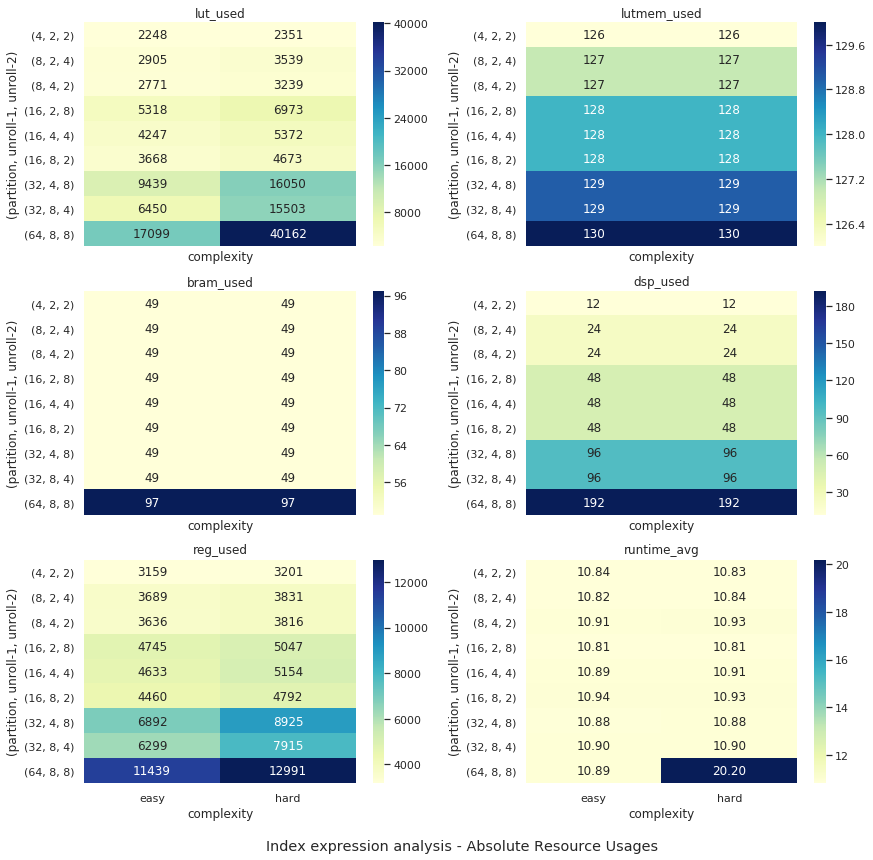

In [5]:
plt.figure()
sns.set()
sns.set_palette('muted')

# Configuration for subplot
cols = 2
rows = int(len(keys) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 14), sharex=True)

for idx, key in enumerate(keys):
    # Get current axes for the subplot
    ax = axes[int(idx / cols), idx % cols]
    pv = df.copy().pivot('config', 'complexity', key)
    sns.heatmap(pv, ax=ax, cmap="YlGnBu", annot=True, fmt='.2f' if key=='runtime_avg' else '.0f')
    ax.set_ylabel('(partition, unroll-1, unroll-2)')
    ax.title.set_text(key)
    
fig.subplots_adjust(wspace=0.3)
fig.suptitle('Index expression analysis - Absolute Resource Usages', y=0.07)

In [6]:
fig.savefig('absolute.png', dpi=300)

Text(0.5, 0.07, 'Index expression analysis - Absolute Resource Usages')

<Figure size 432x288 with 0 Axes>

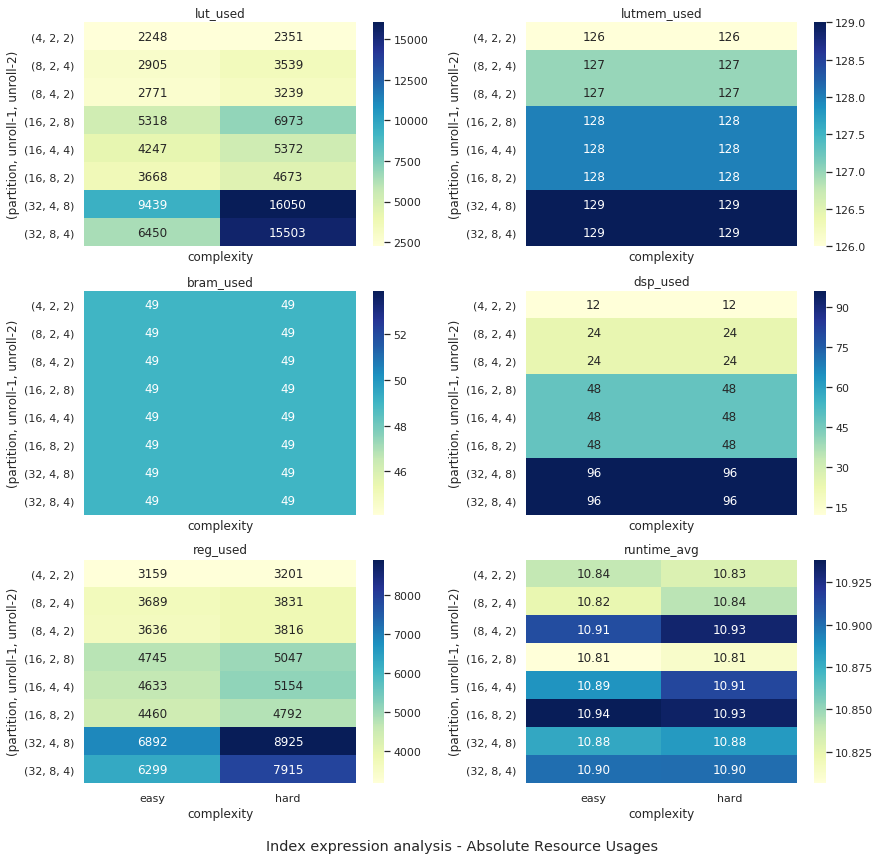

In [7]:
df = df[df.partition != 64]

plt.figure()
sns.set()
sns.set_palette('muted')

# Configuration for subplot
cols = 2
rows = int(len(keys) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 14), sharex=True)

for idx, key in enumerate(keys):
    # Get current axes for the subplot
    ax = axes[int(idx / cols), idx % cols]
    pv = df.copy().pivot('config', 'complexity', key)
    sns.heatmap(pv, ax=ax, cmap="YlGnBu", annot=True, fmt='.2f' if key=='runtime_avg' else '.0f')
    ax.set_ylabel('(partition, unroll-1, unroll-2)')
    ax.title.set_text(key)
    
fig.subplots_adjust(wspace=0.3)
fig.suptitle('Index expression analysis - Absolute Resource Usages', y=0.07)

In [8]:
fig.savefig('absolute-small.png', dpi=300)